**author**: lukethompson@gmail.com<br>
**date**: 9 Oct 2017<br>
**language**: Python 3.5<br>
**license**: BSD3<br>

## otu_scatter_plots.ipynb

In [1]:
import biom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def scatter_map(table, samples, seq):
    otu_count = table.data(id=seq, axis='observation')
    df_otu = pd.DataFrame(data=otu_count, index=samples, columns=['otu'])
    df_otu_map = pd.merge(df_map, df_otu, left_index=True, right_index=True)
    # must remove zero counts otherwise scatter plot is misleading
    df_otu_map.otu = [np.nan if x==0 else x for x in df_otu_map.otu]
    return(df_otu_map)

In [3]:
path_map = '../../data/mapping-files/emp_qiime_mapping_subset_2k.tsv'
path_biom = '../../data/biom-tables/emp_deblur_100bp.subset_2k.rare_5000.biom'

In [4]:
df_map = pd.read_csv(path_map, index_col=0, sep='\t')

In [5]:
table = biom.load_table(path_biom)
otus = table.ids(axis='observation')
samples = table.ids(axis='sample')

#### Plot a single OTU vs envir param

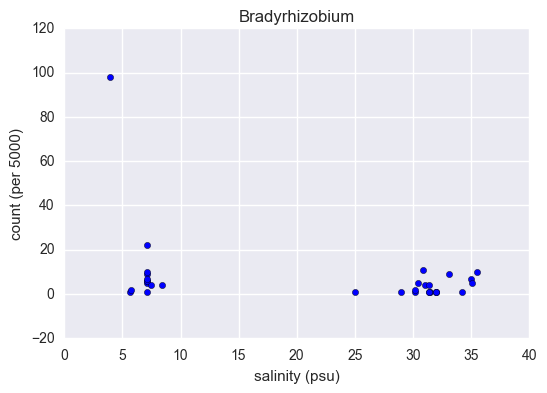

In [7]:
name = 'Bradyrhizobium' # (rank 1)
seq = 'TACGAAGGGGGCTAGCGTTGCTCGGAATCACTGGGCGTAAAGGGTGCGTAGGCGGGTCTTTAAGTCAGGGGTGAAATCCTGGAGCTCAACTCCAGAACTG'
df_otu_map = scatter_map(table, samples, seq)
plt.scatter(df_otu_map.salinity_psu, df_otu_map.otu)
plt.title(name)
plt.xlabel('salinity (psu)')
plt.ylabel('count (per 5000)')

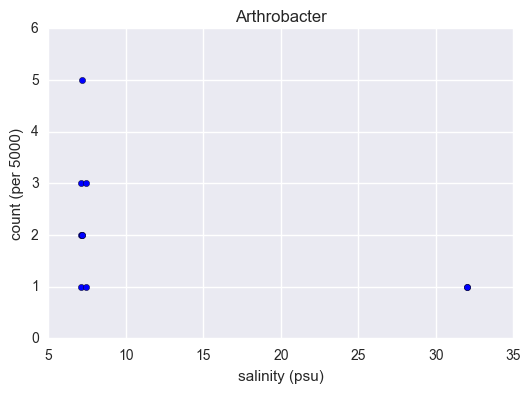

In [8]:
name = 'Arthrobacter' # (rank 4)
seq = 'TACGTAGGGCGCAAGCGTTATCCGGAATTATTGGGCGTAAAGAGCTCGTAGGCGGTTTGTCGCGTCTGCCGTGAAAGTCCGGGGCTCAACTCCGGATCTG'
df_otu_map = scatter_map(table, samples, seq)
plt.scatter(df_otu_map.salinity_psu, df_otu_map.otu)
plt.title(name)
plt.xlabel('salinity (psu)')
plt.ylabel('count (per 5000)')